<a href="https://colab.research.google.com/github/catafest/colab_google/blob/master/catafest_010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Detectron2 is Facebook AI Research's next generation software system that implements state-of-the-art object detection algorithms.*

Select Runtime - Change runtime type from menu and select GPU.

All you need to install with pip tool.

In [ ]:
!pip install youtube-dl
!pip uninstall -y opencv-python-headless opencv-contrib-python
!apt install python3-opencv
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-opencv is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html


In [ ]:
# This is the video we're going to process
from IPython.display import YouTubeVideo, display

set the video from YouTube by Id:

In [ ]:
video = YouTubeVideo("AJHUOq11Lss", width=640)


display the video selected by Id from YouTube.

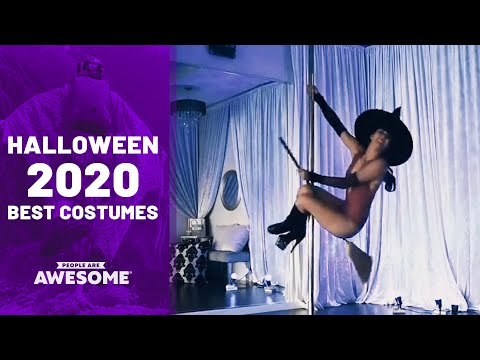

In [ ]:
display(video)

download the video like video.mp4 and convert it with ffmpeg by time to video-clip.mp4

In [ ]:
!youtube-dl https://www.youtube.com/watch?v=AJHUOq11Lss -f 22 -o video.mp4
!ffmpeg -i video.mp4 -t 00:00:07 -c:v copy video-clip.mp4

[youtube] AJHUOq11Lss: Downloading webpage
[download] Destination: video.mp4
[download] 100% of 24.56MiB in 00:01
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --

In [ ]:
get 'detectron2' , this help to select destination path of demo.py

In [ ]:
!git clone https://github.com/facebookresearch/detectron2

fatal: destination path 'detectron2' already exists and is not an empty directory.


check if exist video-output.mkv and delete it:

In [ ]:
!for file in *.mkv; do rm -- "$file"; done

run with the "demo.py" tool GitHub repo to detect all

In [ ]:
!python detectron2/demo/demo.py --config-file detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml --video-input video-clip.mp4 --confidence-threshold 0.6 --output video-output.mkv \
  --opts MODEL.WEIGHTS detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl

Failed to load OpenCL runtime
[11/08 12:16:15 detectron2]: Arguments: Namespace(confidence_threshold=0.6, config_file='detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl'], output='video-output.mkv', video_input='video-clip.mp4', webcam=False)
[11/08 12:16:20 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl
[11/08 12:16:20 fvcore.common.file_io]: URL https://dl.fbaipublicfiles.com/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl cached in /root/.torch/fvcore_cache/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl
[11/08 12:16:20 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
  0% 0/211 [00:00<?, ?it/s]/root/.local/lib/python3.6/site-pa

download the file result like: video-output.mkv

In [ ]:
from google.colab import files
files.download('video-output.mkv')

FileNotFoundError: ignored

show the result:

In [ ]:
from IPython.display import HTML
from base64 import b64encode
video_path = 'video-output.mkv'
mp4 = open(video_path,'rb').read()
decoded_vid = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video width=400 controls><source src={decoded_vid} type="video/mp4"></video>')
#video_out = 'video-output.mkv'
